In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

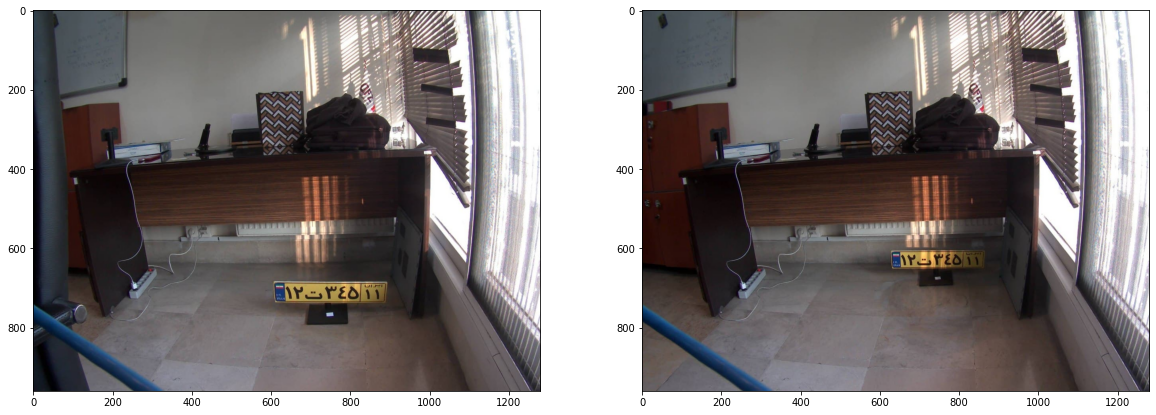

In [2]:
close = cv2.imread('close.jpg')
far = cv2.imread('far.jpg')

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(cv2.cvtColor(close, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(far, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
def apply_perspective_transform(src_points, dst_points, input_image, dest_image_size):
    # Convert points to numpy arrays
    src_points = np.array(src_points, dtype=np.float32)
    dst_points = np.array(dst_points, dtype=np.float32)

    # Calculate the perspective transformation matrix
    matrix = cv2.getPerspectiveTransform(src_points, dst_points)

    # Apply the perspective transformation
    transformed_image = cv2.warpPerspective(input_image, matrix, dest_image_size)

    return transformed_image

In [4]:
width, height = 800, 800
dst_points = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
src_points = np.float32([[459, 678], [830, 680], [330, 878], [841, 901]])

In [5]:
close_nopers = apply_perspective_transform(src_points, dst_points, close, (width, height))
far_nopers = apply_perspective_transform(src_points, dst_points, far, (width, height))

In [6]:
radius = 10
color = (20, 50, 240)
thickness = 2

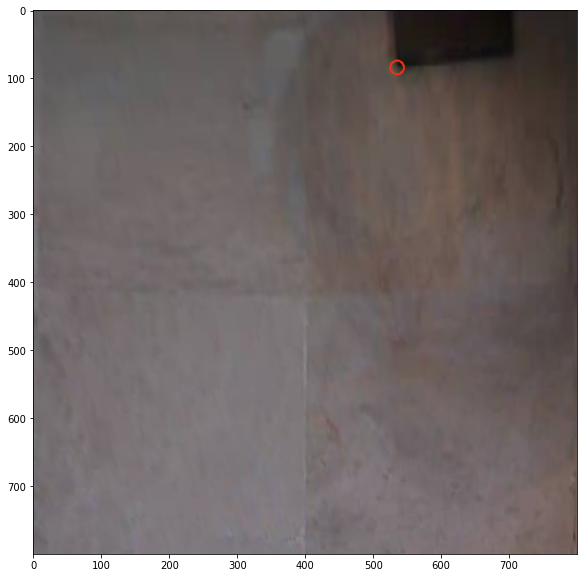

In [7]:
tmp = cv2.circle(far_nopers.copy(), (535, 84), radius, color, thickness)
plt.figure(figsize = (10, 10))
plt.imshow(cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB))

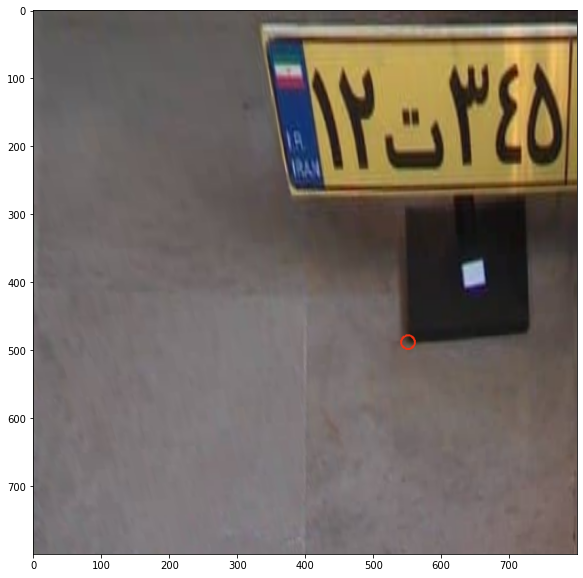

In [8]:
tmp = cv2.circle(close_nopers.copy(), (551, 488), radius, color, thickness)
plt.figure(figsize = (10, 10))
plt.imshow(cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB))

In [9]:
delta = np.float32([488 - 84, 551 - 535])
np.linalg.norm(delta) / 10

40.431671142578125